In [1]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.applications import VGG16
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:

X_test.shape

(10000, 32, 32, 3)

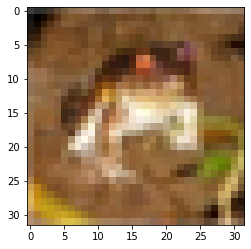

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

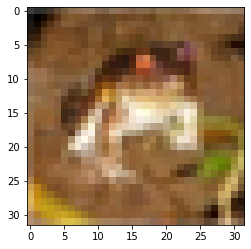

In [8]:
plt.imshow(X_train[0])


one-hot encoding is done to coonert the given data to categorical data

In [9]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
print(y_train[0])

[6]


In [11]:
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Initaliging the sequential Model

In [12]:
base_model = VGG16(weights='imagenet', include_top=False)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [13]:
x = base_model.output

In [14]:
x.shape

TensorShape([None, None, None, 512])

In [15]:
x = GlobalAveragePooling2D()(x)

In [16]:
x.shape

TensorShape([None, 512])

In [17]:
x = Dense(128, activation='relu')(x)

In [18]:
x.shape

TensorShape([None, 128])

In [19]:
predictions = Dense(10, activation='softmax')(x)

In [20]:
for layer in base_model.layers:
    layer.trainable = False

In [21]:
model = Model(inputs=base_model.input, outputs=predictions)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [24]:
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3721 - accuracy: 0.5212
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1894 - accuracy: 0.5836
Epoch 3/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1295 - accuracy: 0.6065
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0894 - accuracy: 0.6166
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0544 - accuracy: 0.6293
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0241 - accuracy: 0.6416
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9975 - accuracy: 0.6509
Epoch 8/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9751 - accuracy: 0.6573
Epoch 9/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9515 - accuracy: 0.6653
Epoch 10/20
1563/1563 [==============================] - 13s 8ms/step - l

In [25]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [26]:
for layer in model.layers:
   layer.trainable = True

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs=30, batch_size=42,validation_data=(X_test, Y_test))

Epoch 1/30
1191/1191 [==============================] - 40s 33ms/step - loss: 1.9848 - accuracy: 0.2986 - val_loss: 1.5551 - val_accuracy: 0.3826
Epoch 2/30
1191/1191 [==============================] - 39s 33ms/step - loss: 1.2463 - accuracy: 0.5469 - val_loss: 1.0726 - val_accuracy: 0.6283
Epoch 3/30
1191/1191 [==============================] - 39s 33ms/step - loss: 0.9594 - accuracy: 0.6686 - val_loss: 0.9197 - val_accuracy: 0.6934
Epoch 4/30
1191/1191 [==============================] - 39s 33ms/step - loss: 0.8235 - accuracy: 0.7194 - val_loss: 0.8278 - val_accuracy: 0.7402
Epoch 5/30
1191/1191 [==============================] - 39s 33ms/step - loss: 0.7185 - accuracy: 0.7601 - val_loss: 0.7428 - val_accuracy: 0.7542
Epoch 6/30
1191/1191 [==============================] - 39s 33ms/step - loss: 0.6408 - accuracy: 0.7884 - val_loss: 0.7506 - val_accuracy: 0.7563
Epoch 7/30
1191/1191 [==============================] - 39s 33ms/step - loss: 0.5751 - accuracy: 0.8123 - val_loss: 0.8977 -

In [29]:
pred = model.evaluate(X_test, Y_test)
accuracy_test=pred[1]

313/313 [==============================] - 3s 8ms/step - loss: 0.8486 - accuracy: 0.8241


It is clear that the model is getting overfit,So we have to manage it,I can try it out many ideas like **:**

1.   Using Dropout
2.   List Try Different Model
3.   In pace of Random intilation of the Dense layer we can intilize by different way
4.   Using Different CostFunction
5.   Hyperparameter tunning by different ways(Grid,Random)

